<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.26.4 pmdarima

In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


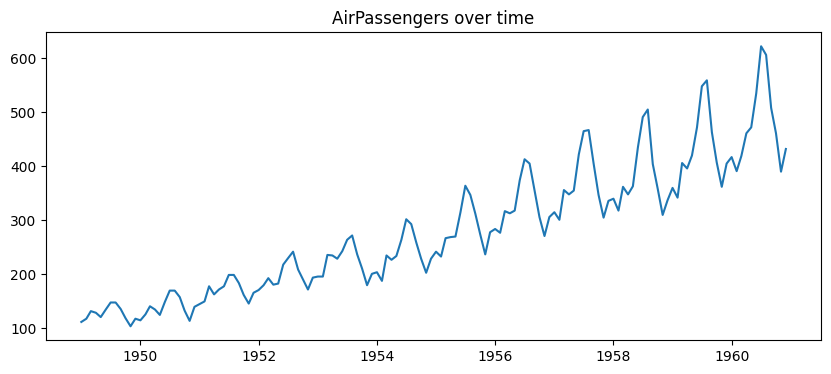

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df["Passengers"])
plt.title("AirPassengers over time")
plt.show()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

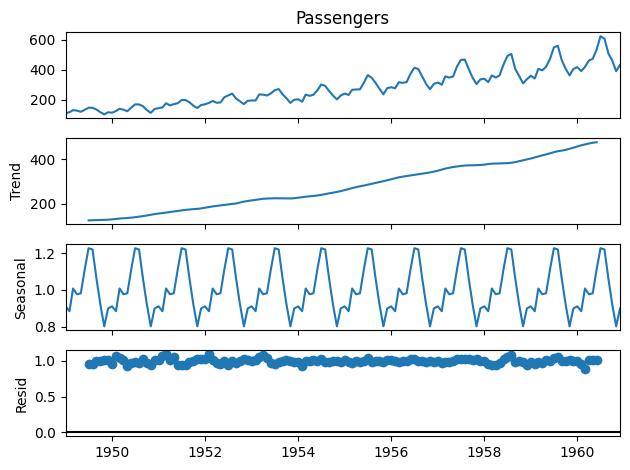

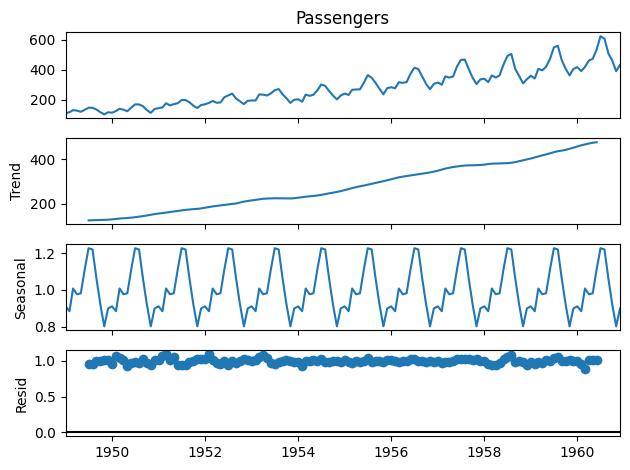

In [6]:
q = seasonal_decompose(df["Passengers"], model="multiplicative")
q.plot()

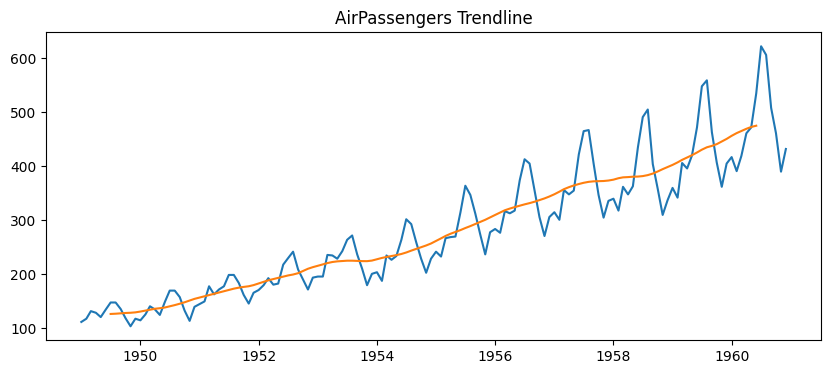

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(q.observed)
plt.plot(q.trend)
plt.title("AirPassengers Trendline")
plt.show()

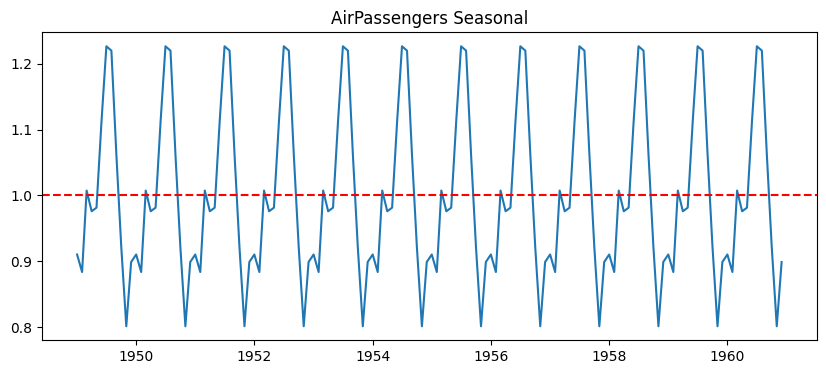

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(q.seasonal)
plt.axhline(y=1, color="red", ls="--")
plt.title("AirPassengers Seasonal")
plt.show()

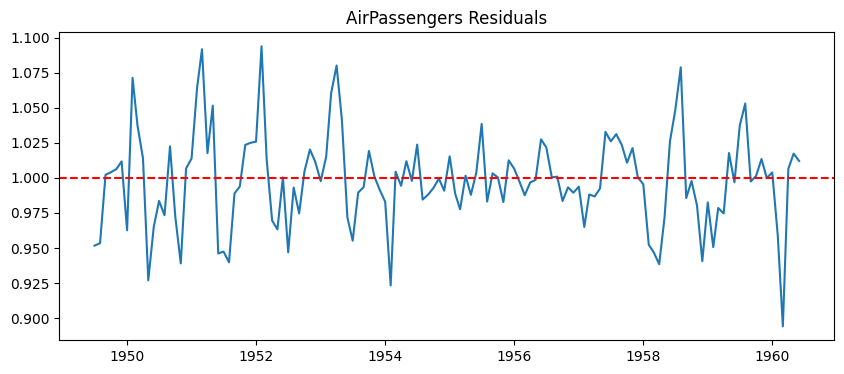

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(q.resid)
plt.axhline(y=1, color = "red", ls="--")
plt.title("AirPassengers Residuals")
plt.show()

In [10]:
import pmdarima as pm

In [11]:
model = pm.auto_arima(
    df["Passengers"],
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=4.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.73 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=4.17 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=1.04 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.17 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.26 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.69 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.65 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(3,1,1)(0,1,0

In [13]:
model.order

(2, 1, 1)

In [14]:
model

,order,"(2, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [17]:
forecast, conf_int = model.predict(n_periods=48, return_conf_int=True)

In [20]:
forecast

,0
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [21]:
type(forecast)

pandas.core.series.Series

In [22]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["forecast"]

In [23]:
df_forecast[["lower", "upper"]] = conf_int

In [24]:
df_forecast.head()

,forecast,lower,upper
1961-01-01,445.634924,423.344835,467.925013
1961-02-01,420.395010,394.235375,446.554644
1961-03-01,449.198328,419.831684,478.564972
1961-04-01,491.839952,460.376228,523.303677
1961-05-01,503.394475,470.380419,536.408532


In [25]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,forecast,lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


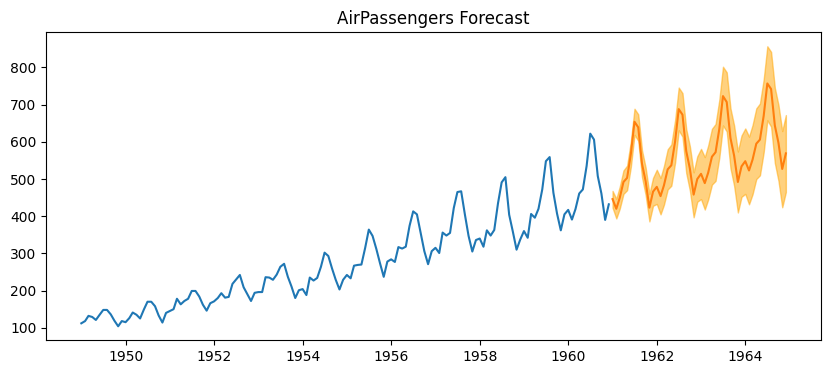

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(df["Passengers"])
plt.plot(df_forecast["forecast"])
plt.title("AirPassengers Forecast")
plt.fill_between(
    df_forecast.index,
    df_forecast["lower"],
    df_forecast["upper"],
    color="orange",
    alpha=0.5
)
plt.show()